# Autoencoders

Autoencoder in TF Keras with the OASIS dataset

In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy
import numpy as np
print(tf.config.list_physical_devices('GPU'))

[]


Parameters for the network

In [2]:
depth = 32 #how much encoding to apply, compression of factor 24.5 if MNIST 28*28
length = 256*256
batch_size = 32

original_dim = 256*256
latent_dim = 32

In [14]:
def load_data(path):
    # Returns images dataset of each data catagory
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        label_mode=None,
        image_size=(128, 128),
        batch_size=batch_size,
        subset='training',
        validation_split=0.2,
        seed = 123
    )
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        path,
        label_mode=None,
        image_size=(128, 128),
        batch_size=batch_size,
        subset='validation',
        validation_split=0.2,
        seed = 123
    )
    return train_ds, val_ds


Load the dataset, reshape as an image and normalise it

In [38]:
#load the data

train, validate= load_data("C:\COMP3710\AKOA_Analysis")

# turing data into 1dim arrays without the labels        
# x_train = np.concatenate([x for x, y in train], axis=0)
# x_validate = np.concatenate([x for x, y in validate], axis=0)

x_train = tf.concat([x for x in train], axis=0)
x_validate = tf.concat([x for x in validate], axis=0)

x_train = x_train / 255.
x_validate = x_validate / 255.

print(x_train.shape)
print(x_validate.shape)



Found 18680 files belonging to 1 classes.
Using 14944 files for training.
Found 18680 files belonging to 1 classes.
Using 3736 files for validation.
(14944, 128, 128, 3)
(3736, 128, 128, 3)


In [35]:
# mean of the data
mean, var = tf.nn.moments(x_train, axes=[1])

In [53]:
def relu_bn(inputs: tf.Tensor) -> tf.Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

VectorQuantizer = keras.Sequential(
    [
        keras.Input(shape=(128, 128, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.ReLU(),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.ReLU(),
        layers.Conv2D(128, kernel_size=3, strides=2, padding="same"),
        layers.ReLU(),
    ],
    name="VectorQuantizer",
)
VectorQuantizer.summary()

Model: "VectorQuantizer"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 64)        3136      
_________________________________________________________________
re_lu_6 (ReLU)               (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 128)       131200    
_________________________________________________________________
re_lu_7 (ReLU)               (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
re_lu_8 (ReLU)               (None, 16, 16, 128)       0         
Total params: 281,920
Trainable params: 281,920
Non-trainable params: 0
_____________________________________________

In [165]:
vae.fit(x_train, x_train, epochs=30, batch_size=batch_size, validation_data=(x_validate, x_validate))

Epoch 1/30
302/302 [==============================] - 23s 75ms/step - loss: 55123.8672 - accuracy: 0.0012 - val_loss: 51650.3828 - val_accuracy: 0.0036
Epoch 2/30
302/302 [==============================] - 26s 86ms/step - loss: 50876.8477 - accuracy: 0.0023 - val_loss: 51251.0938 - val_accuracy: 0.0027
Epoch 3/30
302/302 [==============================] - 24s 81ms/step - loss: 50410.3750 - accuracy: 0.0010 - val_loss: 50835.2969 - val_accuracy: 0.0045
Epoch 4/30
302/302 [==============================] - 23s 76ms/step - loss: 50120.5312 - accuracy: 0.0016 - val_loss: 50727.0898 - val_accuracy: 0.0018
Epoch 5/30
302/302 [==============================] - 21s 70ms/step - loss: 50009.4570 - accuracy: 0.0032 - val_loss: 50711.9883 - val_accuracy: 8.9286e-04
Epoch 6/30
302/302 [==============================] - 22s 73ms/step - loss: 49894.1133 - accuracy: 0.0033 - val_loss: 50561.1211 - val_accuracy: 0.0000e+00
Epoch 7/30
302/302 [==============================] - 22s 72ms/step - loss: 4981

In [166]:
decoded_imgs = vae.predict(x_test)

Plot the results of the input and the autoencoder output

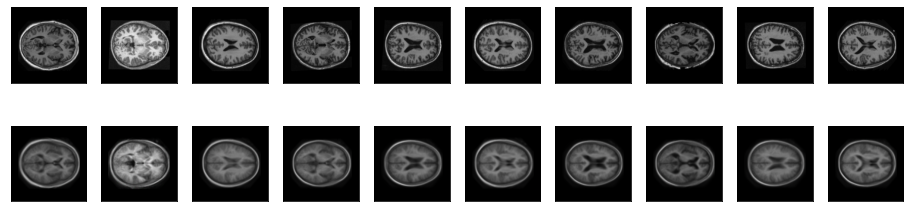

In [167]:
import matplotlib.pyplot as plt

n = 10  # how many images we will display
plt.figure(figsize=(16, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(128, 128,-1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(128, 128,-1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

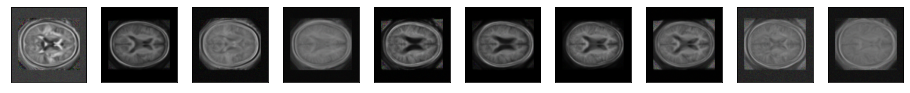

In [168]:
# Display a 2D manifold

n = 10  # how many images we will display


vector = tf.random.normal(shape=(n, latent_dim))
x_decoded = decoder.predict(vector)

plt.figure(figsize=(16, 4))
for i in range(n):

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_decoded[i].reshape(-1, 128,3))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# References
# MNIST Autoencoder from Convolutional Neural Networks Module COMP3710
# Creation of network inspired from https://blog.keras.io/building-autoencoders-in-keras.html (F. Chollet, 2016)